# Notebook 2: Intro to vector data

In Notebook 1, we created a basic land use raster plot of the OU campus and the area surrounding it. In this notebook, we'll start to work with vector data. In particular, we'll work with a shapefile of Michigan city boundaries so that we can see which municipalities are part of the OU campus. As described in the section on vector files, we can find boundary shapefiles at [https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html). I've already downloaded the one for Michigan.

In [3]:
from pathlib import Path
import geopandas as gpd


In [4]:
mi_places_file = Path('../data', 'cb_2022_26_place_500k', 'cb_2022_26_place_500k.shp')
mi_places_gdf = gpd.read_file(mi_places_file)
mi_places_gdf

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,26,82780,01627204,1600000US2682780,2682780,Wakefield,Wakefield city,MI,Michigan,25,20389505,1465294,"POLYGON ((-89.98990 46.47580, -89.98972 46.477..."
1,26,37860,02398497,1600000US2637860,2637860,Hesperia,Hesperia village,MI,Michigan,47,2118889,97382,"POLYGON ((-86.04946 43.57584, -86.03964 43.575..."
2,26,10760,02397458,1600000US2610760,2610760,Britton,Britton village,MI,Michigan,47,2049902,0,"POLYGON ((-83.84044 41.98837, -83.83784 41.987..."
3,26,89320,01627304,1600000US2689320,2689320,Zilwaukee,Zilwaukee city,MI,Michigan,25,5726169,403460,"POLYGON ((-83.93590 43.47955, -83.93557 43.494..."
4,26,89260,01627302,1600000US2689260,2689260,Zeeland,Zeeland city,MI,Michigan,25,7747148,48803,"POLYGON ((-86.03850 42.80958, -86.03564 42.812..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,26,47240,02583750,1600000US2647240,2647240,Levering,Levering CDP,MI,Michigan,57,1129783,0,"POLYGON ((-84.79238 45.63911, -84.78716 45.638..."
741,26,12290,02583725,1600000US2612290,2612290,Caberfae,Caberfae CDP,MI,Michigan,57,1145291,0,"POLYGON ((-85.73545 44.24772, -85.73040 44.247..."
742,26,60640,02583758,1600000US2660640,2660640,Omena,Omena CDP,MI,Michigan,57,11704146,129899,"POLYGON ((-85.61798 45.07651, -85.59513 45.076..."
743,26,74960,01627097,1600000US2674960,2674960,Southgate,Southgate city,MI,Michigan,25,17805442,0,"POLYGON ((-83.22984 42.22754, -83.22439 42.227..."


Notice the `geometry` column contains POLYGON objects corresponding to the boundary for each place.

### Question

Let's find the records for Auburn Hills and Rochester Hills as these are relevant for the OU campus. We can use the pandas `query` method on a `GeoDataFrame` since it's just an extension of a pandas `DataFrame`. Store the answer in a new `GeoDataFrame` named `ou_places_gdf`.

In [ ]:
# Get records for Auburn Hills and Rochester Hills

### Answer

In [5]:
ou_places_gdf = mi_places_gdf.query('NAME == "Auburn Hills" or NAME == "Rochester Hills"')
ou_places_gdf

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
471,26,04105,01625860,1600000US2604105,2604105,Auburn Hills,Auburn Hills city,MI,Michigan,25,43095047,113296,"POLYGON ((-83.32895 42.70592, -83.30717 42.707..."
731,26,69035,01626990,1600000US2669035,2669035,Rochester Hills,Rochester Hills city,MI,Michigan,25,84960992,254848,"POLYGON ((-83.21403 42.70952, -83.19542 42.709..."


### Plotting vector data in a `GeoDataFrame`

GeoPandas provides a `plot()` function for `GeoDataFrame` objects. As you might have guessed, it's using matplotlib to actually generate the plots. In general, any style options that you use in matplotlib can be passed to `plot()`. A few useful resources from the GeoPandas docs are:

- https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
- https://geopandas.org/en/stable/docs/user_guide/mapping.html

<Axes: >

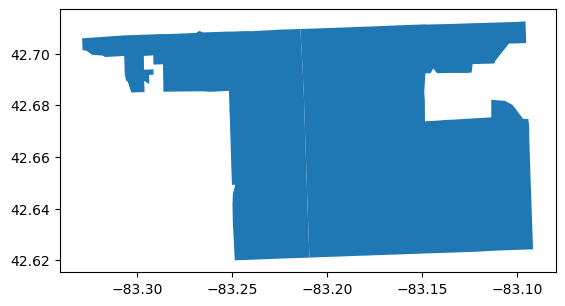

In [8]:
ou_places_gdf.plot()

It's easy to create a [chloropleth map]() by passing in a column name to use as a basis for color selection. Often we might use something like population or some other metric of interest. We don't really have such a column in our `GeoDataFrame` but can use any column that has different values for the cities if we want to simply make the individual cities clear. I'll use "GEOID".

<Axes: >

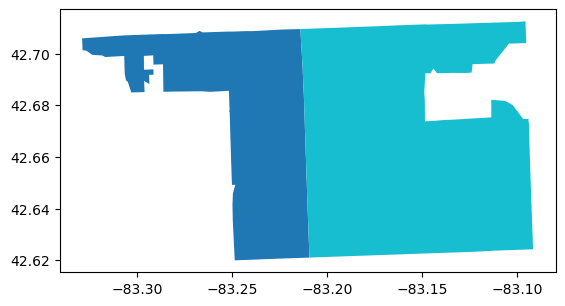

In [9]:
ou_places_gdf.plot(column="GEOID")

You can tell by the axis labels that we are working in longitude (x) and latitude (y).

Let's explore the Rochester Hills polygon.

In [10]:
rh_polygon = ou_places_gdf.iloc[1]['geometry']

Autoprinting a **shapely** object results in a little shape plot.

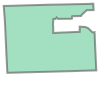

In [12]:
rh_polygon

If you want to see the actual verticies, use `print`.

In [19]:
print(rh_polygon)

POLYGON ((-83.21403 42.709523, -83.195423 42.709992, -83.184639 42.710306, -83.175624 42.710549, -83.1746 42.710573, -83.169093 42.710741, -83.158337 42.711071, -83.147793 42.711337, -83.147658 42.711247, -83.140801 42.711387, -83.135022 42.711478, -83.125061 42.711715, -83.100509 42.712254, -83.095441 42.712499, -83.095039 42.70407, -83.104159 42.703863, -83.11132 42.697235, -83.111792 42.69615, -83.115118 42.696098, -83.123289 42.695918, -83.123793 42.692669, -83.126099 42.692496, -83.134249 42.692523, -83.14206 42.692404, -83.143983 42.694268, -83.145429 42.692365, -83.148162 42.692371, -83.14876 42.68503, -83.148452 42.681774, -83.148402 42.674197, -83.148419 42.673784, -83.14325 42.673966, -83.138061 42.674286, -83.13346 42.674423, -83.113444 42.675317, -83.113453 42.682113, -83.106193 42.681704, -83.102206 42.680106, -83.096701 42.674735, -83.094345 42.674683, -83.093791 42.674745, -83.093962 42.673709, -83.093706 42.67361, -83.093492 42.671311, -83.093458 42.66782, -83.09314 42.

Polygons are just a collection of points with the first point and last point being identical. The `POLYGON` object is actually defined as a class in the [shapely]() library. Shapely makes it easy to work with points, curves, and surfaces with Python. Under the hood, Shapely uses the [GEOS](https://libgeos.org/) library:

> GEOS is a C/C++ library for [computational geometry](https://en.wikipedia.org/wiki/Computational_geometry) with a focus on algorithms used in [geographic information systems](https://en.wikipedia.org/wiki/Geographic_information_system) (GIS) software. It implements the OGC [Simple Features](https://en.wikipedia.org/wiki/Simple_Features) geometry model and provides all the spatial functions in that standard as well as many others. GEOS is a core dependency of [PostGIS](https://postgis.net/), [QGIS](), [GDAL](), [Shapely]() and many others.


Let's do some simple shape manipulations to understand vector data a little better.

### Points, lines and polygons

The fundamental building blocks of vector data are points, lines, and polygons. In Shapely, these correspond to the `Point`, `LineString`, and `Polygon` classes. 

In [14]:
from shapely import Point, LineString, LinearRing, Polygon

Let's start with some simple features in the standard x-y coordinate system centered at (0,0).

In [15]:
point_1 = Point(2, 3)
point_2 = Point(1, 4)

Shapely has a bunch of built in methods and properties for working with geometric objects. For example, points have zero length and zero area.

In [16]:
print(f'point_1: {point_1}')
print(f'point_1 length: {point_1.length}')
print(f'point_1 area: {point_1.area}')
print(f'point_1 type: {point_1.geom_type}')

point_1: POINT (2 3)
point_1 length: 0.0
point_1 area: 0.0
point_1 type: Point


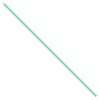

In [17]:
line_1 = LineString([point_1, point_2])
line_1

Its x-y bounding box is a (minx, miny, maxx, maxy) tuple.

In [18]:
line_1.bounds

(1.0, 3.0, 2.0, 4.0)

In [19]:
print(f'line_1: {line_1}')
print(f'line_1 length: {line_1.length}')
print(f'line_1 area: {line_1.area}')
print(f'line_1 type: {line_1.geom_type}')

line_1: LINESTRING (2 3, 1 4)
line_1 length: 1.4142135623730951
line_1 area: 0.0
line_1 type: LineString


In [20]:
line_1.coords

In [21]:
list(line_1.coords)

[(2.0, 3.0), (1.0, 4.0)]

In [22]:
line_1.coords[0]

(2.0, 3.0)

It should be noted that there are no truly "curved" lines in shapely. Curves are approximated with piecewise linear splines.

Let's create a triangle.

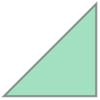

In [17]:
polygon_1 = Polygon([(0, 0), (1, 1), (1, 0)])
polygon_1

In [18]:
list(polygon_1.exterior.coords)

[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

Notice how the first point is duplicated as the last point. 

Can make holes by passing second list of point lists.

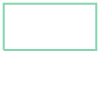

In [23]:
hole = LinearRing([(1, 0.50), (1.5, 0.50), (1.5, 0.75), (1, 0.75)])
hole

In [24]:
hole.length

1.5

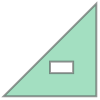

In [25]:
polygon_2 = Polygon([(0, 0), (2, 2), (2, 0)], holes=[hole])
polygon_2

### Challenge: Creating a bounding box

Bounding boxes are commonly used in geospatial analysis to restrict a plot or some analysis to an area of interest. A bounding box is a rectangle (a type of POLYGON). Given what we learned about working with geometric objects above, create a minimal bounding box as a POLYGON object that contains Auburn Hills and Rochester Hills. I'm sure there are multiple ways to do this. Then plot the bounding box as well as the Auburn Hills and Rochester Hills polygons on a single plot. Hint: Shapely has some useful plotting methods. 

### Answer

In [36]:
ah_polygon = ou_places_gdf.iloc[0]['geometry']

In [38]:
print(ah_polygon.bounds)
print(rh_polygon.bounds)

(-83.32895, 42.619938, -83.209216, 42.709523)
(-83.21403, 42.620995, -83.091449, 42.712499)


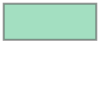

In [40]:
bbox_xmin = min(ah_polygon.bounds[0], rh_polygon.bounds[0])
bbox_ymin = min(ah_polygon.bounds[1], rh_polygon.bounds[1])
bbox_xmax = max(ah_polygon.bounds[2], rh_polygon.bounds[2])
bbox_ymax = max(ah_polygon.bounds[3], rh_polygon.bounds[3])

# Create the POLYGON box from the bounds
bbox_ah_rh = Polygon([(bbox_xmin, bbox_ymin), 
                      (bbox_xmax, bbox_ymin), 
                      (bbox_xmax, bbox_ymax), 
                      (bbox_xmin, bbox_ymax)])

bbox_ah_rh

In [44]:
import matplotlib.pyplot as plt
from shapely.plotting import plot_polygon

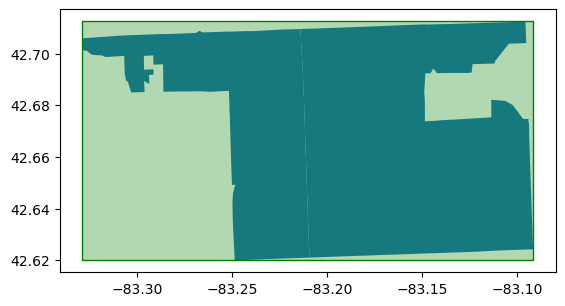

In [50]:
fig, ax = plt.subplots()
ou_places_gdf.plot(ax=ax)
plot_polygon(bbox_ah_rh, ax=ax, add_points=False, color='green')

Another approach would be to try to merge the two polygons into a single polygon and then use the `bounds` property.

In [51]:
from shapely import MultiPolygon

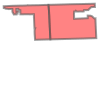

In [52]:
ah_rh_polygon = MultiPolygon([ah_polygon, rh_polygon])
ah_rh_polygon

In [53]:
ah_rh_polygon.bounds

(-83.32895, 42.619938, -83.091449, 42.712499)

In [54]:
bbox_ah_rh.bounds

(-83.32895, 42.619938, -83.091449, 42.712499)